In [60]:
import pandas as pd
import numpy as np


In [9]:
users = pd.read_csv('./relax_challenge/takehome_users.csv', encoding='latin-1')

users.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


In [6]:
engage = pd.read_csv('./relax_challenge/takehome_user_engagement.csv')

In [7]:
engage.head()

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


In [11]:
users.dtypes

object_id                       int64
creation_time                  object
name                           object
email                          object
creation_source                object
last_session_creation_time    float64
opted_in_to_mailing_list        int64
enabled_for_marketing_drip      int64
org_id                          int64
invited_by_user_id            float64
dtype: object

In [12]:
users.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


In [17]:
users['creation_time'] = pd.to_datetime( users['creation_time'] )


In [20]:
users['last_session_datetime'] = pd.to_datetime( users['last_session_creation_time'] , unit='s' )

In [21]:
users['opted_in_to_mailing_list'].value_counts()

0    9006
1    2994
Name: opted_in_to_mailing_list, dtype: int64

In [22]:
users['object_id'].nunique()

12000

In [23]:
users['name'].nunique()

11355

In [24]:
users['email'].nunique()

11980

In [26]:
sum( users['email'].isna() )

0

In [30]:
email_counts = users['email'].value_counts()

doubles = email_counts[email_counts==2]

doubles

PaigeWyatt@gmail.com             2
MandySchroder@gustr.com          2
JacobTye@gmail.com               2
TomSchiffer@gmail.com            2
MagnusSWinther@jourrapide.com    2
LasseLNrgaard@gmail.com          2
KerstinNeudorf@gmail.com         2
KlausMueller@gustr.com           2
MaximilianWalter@gmail.com       2
KristinKappel@yahoo.com          2
NicolaiSHolm@yahoo.com           2
MarkoSeiler@yahoo.com            2
UlrikeGerste@gmail.com           2
AmandaABach@gmail.com            2
LaerkeMBertelsen@gmail.com       2
LeonieDuerr@gmail.com            2
MimirMKarlsen@jourrapide.com     2
ThomasBrandt@gmail.com           2
JaninaSankt@gmail.com            2
AlfieLane@yahoo.com              2
Name: email, dtype: int64

In [31]:
doubles.index

Index(['PaigeWyatt@gmail.com', 'MandySchroder@gustr.com', 'JacobTye@gmail.com',
       'TomSchiffer@gmail.com', 'MagnusSWinther@jourrapide.com',
       'LasseLNrgaard@gmail.com', 'KerstinNeudorf@gmail.com',
       'KlausMueller@gustr.com', 'MaximilianWalter@gmail.com',
       'KristinKappel@yahoo.com', 'NicolaiSHolm@yahoo.com',
       'MarkoSeiler@yahoo.com', 'UlrikeGerste@gmail.com',
       'AmandaABach@gmail.com', 'LaerkeMBertelsen@gmail.com',
       'LeonieDuerr@gmail.com', 'MimirMKarlsen@jourrapide.com',
       'ThomasBrandt@gmail.com', 'JaninaSankt@gmail.com',
       'AlfieLane@yahoo.com'],
      dtype='object')

In [32]:
users[users.email.isin(doubles.index)]

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,last_session_datetime
375,376,2012-08-10 22:27:08,Tye Jacob,JacobTye@gmail.com,SIGNUP_GOOGLE_AUTH,1.344638e+09,1,0,104,NaN,2012-08-10 22:27:08
1169,1170,2014-04-27 16:48:34,Sankt Janina,JaninaSankt@gmail.com,ORG_INVITE,1.398617e+09,1,1,285,623.0,2014-04-27 16:48:34
1603,1604,2014-02-03 04:48:08,Lane Alfie,AlfieLane@yahoo.com,ORG_INVITE,1.391662e+09,0,0,0,4128.0,2014-02-06 04:48:08
2375,2376,2013-03-22 00:12:45,Winther Magnus,MagnusSWinther@jourrapide.com,GUEST_INVITE,NaN,1,0,137,256.0,NaT
2751,2752,2013-10-12 22:10:03,Mueller Klaus,KlausMueller@gustr.com,ORG_INVITE,1.381616e+09,0,0,31,8202.0,2013-10-12 22:10:03
2764,2765,2012-06-29 13:11:26,Karlsen Mimir,MimirMKarlsen@jourrapide.com,GUEST_INVITE,1.341235e+09,1,1,334,2765.0,2012-07-02 13:11:26
3213,3214,2013-02-20 03:31:36,Kappel Kristin,KristinKappel@yahoo.com,ORG_INVITE,1.361504e+09,0,0,264,3918.0,2013-02-22 03:31:36
3426,3427,2013-12-01 11:03:15,Walter Maximilian,MaximilianWalter@gmail.com,SIGNUP_GOOGLE_AUTH,1.385896e+09,0,0,2,NaN,2013-12-01 11:03:15
3582,3583,2012-12-10 15:41:20,Holm Nicolai,NicolaiSHolm@yahoo.com,GUEST_INVITE,1.355154e+09,1,0,243,4225.0,2012-12-10 15:41:20
3605,3606,2013-05-10 08:31:59,Sankt Janina,JaninaSankt@gmail.com,GUEST_INVITE,1.369816e+09,0,0,84,8356.0,2013-05-29 08:31:59


In [33]:
users['creation_source'].value_counts()

ORG_INVITE            4254
GUEST_INVITE          2163
PERSONAL_PROJECTS     2111
SIGNUP                2087
SIGNUP_GOOGLE_AUTH    1385
Name: creation_source, dtype: int64

In [34]:
users['enabled_for_marketing_drip'].value_counts()

0    10208
1     1792
Name: enabled_for_marketing_drip, dtype: int64

In [35]:
engage.head()

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


In [36]:
engage.shape

(207917, 3)

In [37]:
engage.visited.value_counts()

1    207917
Name: visited, dtype: int64

In [39]:
engage.user_id.value_counts()
engage.user_id.nunique()

8823

In [40]:
engage.dtypes

time_stamp    object
user_id        int64
visited        int64
dtype: object

In [42]:
engage['timestamp'] = pd.to_datetime(engage.time_stamp)

In [43]:
engage['timestamp'].max()

Timestamp('2014-06-06 14:58:50')

In [44]:
engage['timestamp'].min()

Timestamp('2012-05-31 08:20:06')

<AxesSubplot:>

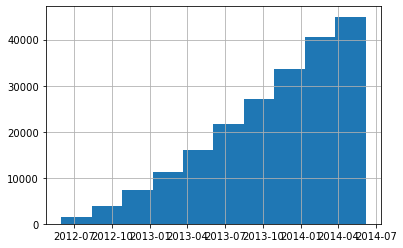

In [45]:
engage['timestamp'].hist()

In [46]:
engage.head()

,time_stamp,user_id,visited,timestamp
0,2014-04-22 03:53:30,1,1,2014-04-22 03:53:30
1,2013-11-15 03:45:04,2,1,2013-11-15 03:45:04
2,2013-11-29 03:45:04,2,1,2013-11-29 03:45:04
3,2013-12-09 03:45:04,2,1,2013-12-09 03:45:04
4,2013-12-25 03:45:04,2,1,2013-12-25 03:45:04


In [47]:
engage.timestamp.nunique()

207220

<AxesSubplot:>

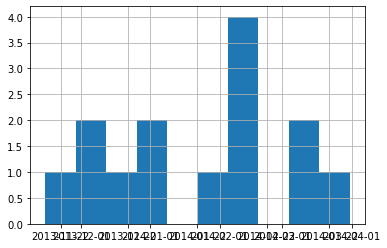

In [51]:
engage[engage.user_id==2].timestamp.hist()

In [53]:
df = engage.sort_values(['user_id','timestamp'])

In [54]:
df.head()

,time_stamp,user_id,visited,timestamp
0,2014-04-22 03:53:30,1,1,2014-04-22 03:53:30
1,2013-11-15 03:45:04,2,1,2013-11-15 03:45:04
2,2013-11-29 03:45:04,2,1,2013-11-29 03:45:04
3,2013-12-09 03:45:04,2,1,2013-12-09 03:45:04
4,2013-12-25 03:45:04,2,1,2013-12-25 03:45:04


In [61]:
df['day_stamp'] = df['timestamp'].dt.floor('d').astype(np.int64)

In [105]:
tmp = df.groupby('user_id')['day_stamp'].rolling(window=3)

### df.groupby('user_id')['day_stamp'].shift(2)
df['date'] = df.timestamp.dt.date
### Then rolling sum over 7 day windows
### See if rolling sum is more than 3 logins per week.



In [107]:
df.head()

,time_stamp,user_id,visited,timestamp,day_stamp,date
0,2014-04-22 03:53:30,1,1,2014-04-22 03:53:30,1398124800000000000,2014-04-22
1,2013-11-15 03:45:04,2,1,2013-11-15 03:45:04,1384473600000000000,2013-11-15
2,2013-11-29 03:45:04,2,1,2013-11-29 03:45:04,1385683200000000000,2013-11-29
3,2013-12-09 03:45:04,2,1,2013-12-09 03:45:04,1386547200000000000,2013-12-09
4,2013-12-25 03:45:04,2,1,2013-12-25 03:45:04,1387929600000000000,2013-12-25


In [111]:
pt = pd.pivot_table(df, index='user_id', columns='date', values='visited')

In [112]:
pt

date,2012-05-31,2012-06-01,2012-06-02,2012-06-03,2012-06-04,2012-06-05,2012-06-06,2012-06-07,2012-06-08,2012-06-09,...,2014-05-27,2014-05-28,2014-05-29,2014-05-30,2014-05-31,2014-06-01,2014-06-02,2014-06-03,2014-06-04,2014-06-06
user_id,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [114]:
pt = pt.fillna(0)

In [156]:

def row_function(row):
    return max( row.rolling(window=8, min_periods=1).sum() )


In [126]:
pt.index

Int64Index([    1,     2,     3,     4,     5,     6,     7,    10,    11,
               13,
            ...
            11989, 11990, 11991, 11992, 11995, 11996, 11997, 11998, 11999,
            12000],
           dtype='int64', name='user_id', length=8823)

In [157]:
max_weekly = pt.apply(row_function, axis=1)

In [158]:
adopted_list = max_weekly[max_weekly>=3].index.to_list()

In [101]:
#df['time_stamp'].resample('D')

df.set_index(df.timestamp)

type(df.index)

##df.index.resample('D')

pandas.core.indexes.numeric.Int64Index

In [102]:
#type(df.time_stamp)
df.dtypes


time_stamp            object
user_id                int64
visited                int64
timestamp     datetime64[ns]
day_stamp              int64
dtype: object

In [103]:
df[df.user_id==3]

,time_stamp,user_id,visited,timestamp,day_stamp
15,2013-03-19 23:14:52,3,1,2013-03-19 23:14:52,1363651200000000000


In [63]:
b = pd.to_timedelta((tmp.max()- tmp.min())).dt.days

In [81]:
b.head(10)

user_id   
1        0     NaN
2        1     NaN
         2     NaN
         3    24.0
         4    26.0
         5    22.0
         6    14.0
         7    34.0
         8    31.0
         9     6.0
Name: day_stamp, dtype: float64

In [72]:
adopted = b[b<=7].index.get_level_values('user_id').unique().tolist()

In [73]:
adopted

[2,
 10,
 20,
 33,
 42,
 43,
 50,
 53,
 60,
 63,
 69,
 74,
 80,
 81,
 82,
 87,
 133,
 135,
 141,
 146,
 153,
 160,
 165,
 168,
 172,
 174,
 185,
 188,
 197,
 200,
 202,
 203,
 209,
 214,
 230,
 245,
 247,
 263,
 265,
 275,
 280,
 283,
 297,
 298,
 305,
 310,
 311,
 321,
 322,
 341,
 345,
 347,
 351,
 362,
 363,
 370,
 383,
 397,
 401,
 418,
 430,
 445,
 450,
 460,
 462,
 469,
 471,
 472,
 478,
 479,
 483,
 492,
 494,
 497,
 502,
 506,
 509,
 510,
 512,
 518,
 520,
 522,
 529,
 535,
 540,
 547,
 553,
 564,
 572,
 589,
 591,
 601,
 603,
 605,
 618,
 627,
 628,
 632,
 634,
 639,
 669,
 679,
 680,
 717,
 724,
 725,
 728,
 754,
 772,
 783,
 786,
 804,
 828,
 845,
 851,
 869,
 874,
 882,
 885,
 901,
 906,
 907,
 912,
 928,
 932,
 934,
 937,
 943,
 953,
 980,
 985,
 1007,
 1009,
 1013,
 1017,
 1018,
 1026,
 1027,
 1035,
 1039,
 1055,
 1061,
 1072,
 1089,
 1093,
 1094,
 1099,
 1106,
 1107,
 1119,
 1123,
 1124,
 1128,
 1129,
 1136,
 1145,
 1150,
 1151,
 1155,
 1156,
 1163,
 1173,
 1186,
 1196,


In [151]:
b[60]

740     NaN
741     NaN
742    12.0
743     7.0
744    20.0
745    23.0
746    21.0
747    17.0
Name: day_stamp, dtype: float64

In [74]:
len(adopted)

1656

In [80]:
len( pd.unique(adopted) )

1656

In [82]:
users.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,last_session_datetime
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,2014-04-22 03:53:30
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,2014-03-31 03:45:04
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0,2013-03-19 23:14:52
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0,2013-05-22 08:09:28
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0,2013-01-22 10:14:20


In [83]:
users['adopted'] = 1*(users.object_id.isin(adopted))

In [84]:
users.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,last_session_datetime,adopted
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,2014-04-22 03:53:30,0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,2014-03-31 03:45:04,1
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0,2013-03-19 23:14:52,0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0,2013-05-22 08:09:28,0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0,2013-01-22 10:14:20,0


In [85]:
users.adopted.sum()

1656

In [86]:
users.adopted.value_counts()

0    10344
1     1656
Name: adopted, dtype: int64

In [88]:
users.groupby('creation_source')['adopted'].value_counts(normalize=True)

creation_source     adopted
GUEST_INVITE        0          0.829404
                    1          0.170596
ORG_INVITE          0          0.865068
                    1          0.134932
PERSONAL_PROJECTS   0          0.918522
                    1          0.081478
SIGNUP              0          0.855295
                    1          0.144705
SIGNUP_GOOGLE_AUTH  0          0.827437
                    1          0.172563
Name: adopted, dtype: float64

In [ ]:
### Dummies and logistic regression



In [91]:
sum( users.invited_by_user_id.isnull() )

5583

In [159]:
diff_set = set(adopted).difference(set(adopted_list))

In [160]:
diff_set

set()

In [162]:
len(adopted)


1656

In [163]:
len(adopted_list)

1656

In [161]:
len(diff_set)

0

In [143]:
df.head()

,time_stamp,user_id,visited,timestamp,day_stamp,date
0,2014-04-22 03:53:30,1,1,2014-04-22 03:53:30,1398124800000000000,2014-04-22
1,2013-11-15 03:45:04,2,1,2013-11-15 03:45:04,1384473600000000000,2013-11-15
2,2013-11-29 03:45:04,2,1,2013-11-29 03:45:04,1385683200000000000,2013-11-29
3,2013-12-09 03:45:04,2,1,2013-12-09 03:45:04,1386547200000000000,2013-12-09
4,2013-12-25 03:45:04,2,1,2013-12-25 03:45:04,1387929600000000000,2013-12-25


In [144]:
df[df.user_id==60]

,time_stamp,user_id,visited,timestamp,day_stamp,date
740,2014-03-21 22:56:03,60,1,2014-03-21 22:56:03,1395360000000000000,2014-03-21
741,2014-03-29 22:56:03,60,1,2014-03-29 22:56:03,1396051200000000000,2014-03-29
742,2014-04-02 22:56:03,60,1,2014-04-02 22:56:03,1396396800000000000,2014-04-02
743,2014-04-05 22:56:03,60,1,2014-04-05 22:56:03,1396656000000000000,2014-04-05
744,2014-04-22 22:56:03,60,1,2014-04-22 22:56:03,1398124800000000000,2014-04-22
745,2014-04-28 22:56:03,60,1,2014-04-28 22:56:03,1398643200000000000,2014-04-28
746,2014-05-13 22:56:03,60,1,2014-05-13 22:56:03,1399939200000000000,2014-05-13
747,2014-05-15 22:56:03,60,1,2014-05-15 22:56:03,1400112000000000000,2014-05-15


In [145]:
60 in adopted

True

In [146]:
60 in adopted_list

False

In [147]:
pt.head()

date,2012-05-31,2012-06-01,2012-06-02,2012-06-03,2012-06-04,2012-06-05,2012-06-06,2012-06-07,2012-06-08,2012-06-09,...,2014-05-27,2014-05-28,2014-05-29,2014-05-30,2014-05-31,2014-06-01,2014-06-02,2014-06-03,2014-06-04,2014-06-06
user_id,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [148]:
pt.loc[60]

date
2012-05-31    0.0
2012-06-01    0.0
2012-06-02    0.0
2012-06-03    0.0
2012-06-04    0.0
             ... 
2014-06-01    0.0
2014-06-02    0.0
2014-06-03    0.0
2014-06-04    0.0
2014-06-06    0.0
Name: 60, Length: 736, dtype: float64

In [155]:
max( pt.loc[60].rolling(8,1).sum() )

3.0

In [166]:
all( [x in adopted_list for x in adopted] )

True

In [167]:
all( [x in adopted for x in adopted_list] )

True

In [168]:
users.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,last_session_datetime,adopted
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,2014-04-22 03:53:30,0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,2014-03-31 03:45:04,1
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0,2013-03-19 23:14:52,0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0,2013-05-22 08:09:28,0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0,2013-01-22 10:14:20,0


In [171]:
pd.get_dummies(users.creation_source)

users['invited'] = 1*(users.invited_by_user_id>0)


In [172]:
users.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,last_session_datetime,adopted,invited
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,2014-04-22 03:53:30,0,1
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,2014-03-31 03:45:04,1,1
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0,2013-03-19 23:14:52,0,1
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0,2013-05-22 08:09:28,0,1
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0,2013-01-22 10:14:20,0,1


In [173]:
users[['opted_in_to_mailing_list','enabled_for_marketing_drip','invited']]

,opted_in_to_mailing_list,enabled_for_marketing_drip,invited
0,1,0,1
1,0,0,1
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
11995,0,0,1
11996,0,0,0
11997,1,1,1
11998,0,0,0


In [174]:
users[['opted_in_to_mailing_list','enabled_for_marketing_drip','invited']].join(pd.get_dummies(users.creation_source))

,opted_in_to_mailing_list,enabled_for_marketing_drip,invited,GUEST_INVITE,ORG_INVITE,PERSONAL_PROJECTS,SIGNUP,SIGNUP_GOOGLE_AUTH
0,1,0,1,1,0,0,0,0
1,0,0,1,0,1,0,0,0
2,0,0,1,0,1,0,0,0
3,0,0,1,1,0,0,0,0
4,0,0,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...
11995,0,0,1,0,1,0,0,0
11996,0,0,0,0,0,0,0,1
11997,1,1,1,1,0,0,0,0
11998,0,0,0,0,0,1,0,0


In [175]:
X = users[['opted_in_to_mailing_list','enabled_for_marketing_drip','invited']].join(pd.get_dummies(users.creation_source))

In [176]:
y = users['adopted']

In [178]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [179]:
logreg.fit(X,y)

LogisticRegression()

In [183]:
logreg.coef_

array([[ 0.04803188,  0.02150783,  0.10976959,  0.19295726, -0.08318767,
        -0.53385766,  0.10739385,  0.31579614]])

In [184]:
users.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,last_session_datetime,adopted,invited
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,2014-04-22 03:53:30,0,1
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,2014-03-31 03:45:04,1,1
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0,2013-03-19 23:14:52,0,1
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0,2013-05-22 08:09:28,0,1
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0,2013-01-22 10:14:20,0,1


In [188]:
users.groupby('creation_source')['adopted'].value_counts()

users.groupby('creation_source')['adopted'].mean()


creation_source
GUEST_INVITE          0.170596
ORG_INVITE            0.134932
PERSONAL_PROJECTS     0.081478
SIGNUP                0.144705
SIGNUP_GOOGLE_AUTH    0.172563
Name: adopted, dtype: float64

In [190]:
users.groupby('opted_in_to_mailing_list')['adopted'].value_counts()

users.groupby('opted_in_to_mailing_list')['adopted'].mean()

opted_in_to_mailing_list
0    0.136243
1    0.143287
Name: adopted, dtype: float64

In [191]:
users.groupby('enabled_for_marketing_drip')['adopted'].mean()

enabled_for_marketing_drip
0    0.137049
1    0.143415
Name: adopted, dtype: float64

In [192]:
users.invited.value_counts()

1    6417
0    5583
Name: invited, dtype: int64

In [193]:
users.groupby('invited')['adopted'].mean()

invited
0    0.127709
1    0.146953
Name: adopted, dtype: float64

In [194]:
users.adopted.value_counts(normalize=True)

0    0.862
1    0.138
Name: adopted, dtype: float64

Results:

Overall, 13.8% of users are considered adopted.
The 'Creation Source' data is predictive of percentage of users who are considered 'adopted'
The 'PERSONAL_PROJECTS' creation source had a lower adoption rate of just 8.1%.
There was little difference in adoption rates for the users who opted in to the mailing lists versus those who didn't.
There was little difference in adoption rates for the users who were enabled for marketing drip versus those who didn't.
There was also just a small difference in adoption rates between those who were invited versus those who weren't.



